In [1]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

In [2]:
# Use the model
model.train(data="/media/kh/python/2023/0701sam/yolo8/dataset/orignal_set/data.yaml", epochs=300)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
#path = model.export()  # export the model to ONNX format

New https://pypi.org/project/ultralytics/8.0.126 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.120 🚀 Python-3.9.16 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 2080, 7974MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/media/kh/python/2023/0701sam/yolo8/dataset/orignal_set/data.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=F

In [2]:
model = YOLO("runs/detect/train3/weights/best.pt")  # build a new model from scratch


0: 640x448 1 pipette, 1 tip, 5.1ms
Speed: 1.3ms preprocess, 5.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


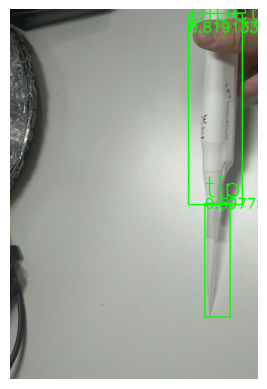


0: 640x448 1 pipette, 1 tip, 5.0ms
Speed: 1.1ms preprocess, 5.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


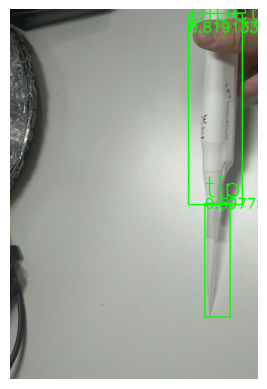


0: 640x448 1 pipette, 1 tip, 5.0ms
Speed: 1.1ms preprocess, 5.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


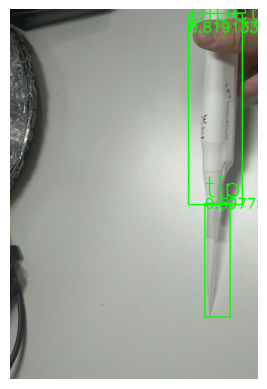

In [10]:
import cv2
import glob
import matplotlib.pyplot as plt


path_list=glob.glob("dataset/orignal_set/test/images/*.png")
names=model.names
for path in path_list:
    path=path_list[0]
    img=cv2.imread(path)
    preds = model.predict(img,conf=0.1)
    for box in preds[0].boxes:
        label=names[box.cls.cpu().numpy()[0]]
        conf=box.conf.cpu().numpy()[0]
        xmin, ymin, xmax, ymax=box.xyxy.cpu().numpy()[0]
        xmin, ymin, xmax, ymax=int(xmin), int(ymin), int(xmax), int(ymax)
        
        # Create the rectangle (bounding box)
        cv2.rectangle(img, pt1=(xmin, ymin), pt2=(xmax, ymax), color=(0, 255, 0), thickness=2)

        # Add the label
        y = ymin - 15 if ymin - 15 > 15 else ymin + 15
        cv2.putText(img, label, (xmin, y), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 2)
        cv2.putText(img, str(conf), (xmin, y+25), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    #imgを表示
    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
